<a href="https://colab.research.google.com/github/NijjohUnno/AmazonExploratoryAnalysis/blob/main/Amazon_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = "/content/drive/MyDrive/Amazon Dataset/Amazon E-Commerce  - Data Table.csv"

amazon = pd.read_csv(data)

#Display the top five rows in the data
amazon.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [2]:
#Display bottom five rows 
amazon.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
amazon['Total Cost'] = amazon['Quantity'] * amazon['Unit_Cost']
amazon['Total Revenue'] = amazon['Quantity'] * amazon['Unit_Price']
amazon['Profit/Loss'] = amazon['Total Revenue'] - amazon['Total Cost']

In [4]:
amazon.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Total Cost,Total Revenue,Profit/Loss
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,80.00,109.00,29.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,49.00,57.00,8.00
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,11.01,15.00,3.99
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,175.00,233.00,58.00
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,105.00,125.01,20.01


<Axes: xlabel='Customer', ylabel='count'>

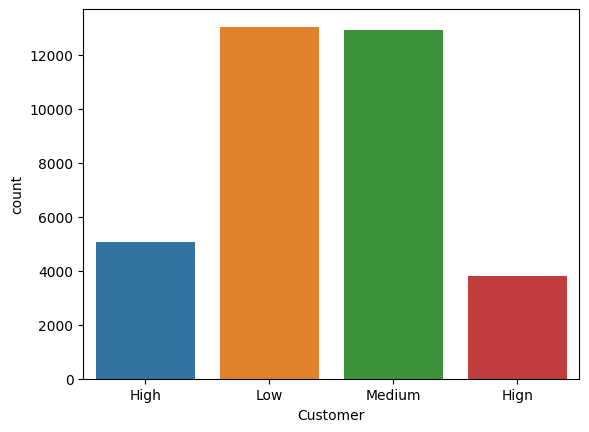

In [5]:
#Data Visualization
import seaborn as sns
sns.countplot(x=amazon['Customer'])

In [6]:
#Cleaned the data
amazon.loc[amazon['Customer'] == 'Hign', 'Customer'] = 'High'

In [7]:
#create a function to group customer age

def age_group(x):
  if x <= 12:
    return "Minor"
  elif x <= 19:
    return "Teenager"
  elif x <= 30:
    return "Youth"
  elif x <= 50:
    return "Adult"
  else:
    return "Elder"

amazon['Customer Age_group'] = amazon['Customer_Age'].apply(age_group)
amazon.head()


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Total Cost,Total Revenue,Profit/Loss,Customer Age_group
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,80.00,109.00,29.00,Youth
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,49.00,57.00,8.00,Youth
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,11.01,15.00,3.99,Youth
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,175.00,233.00,58.00,Youth
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,105.00,125.01,20.01,Youth


<Axes: xlabel='Customer Age_group', ylabel='count'>

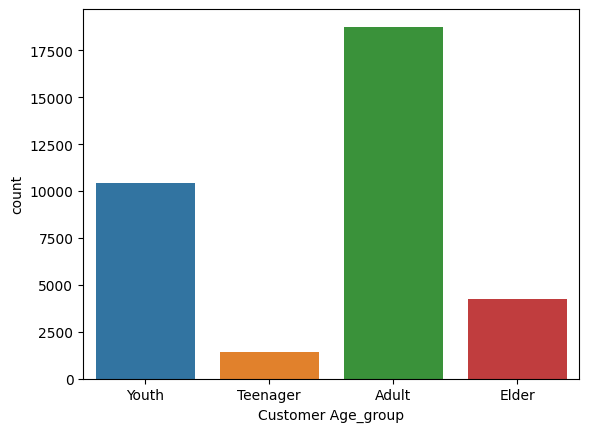

In [8]:
sns.countplot(x=amazon['Customer Age_group'])

<Axes: xlabel='Product_Category', ylabel='count'>

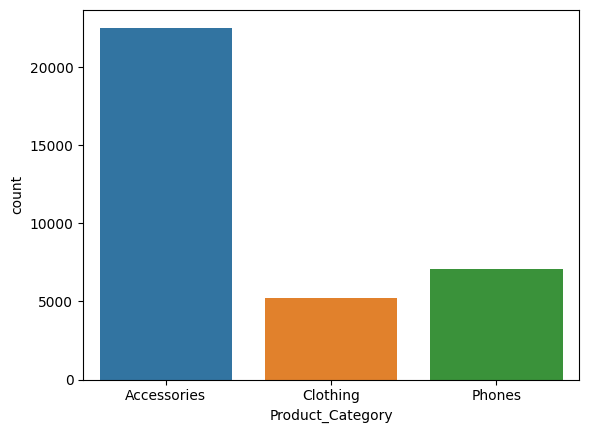

In [9]:
sns.countplot(x=amazon['Product_Category'])

In [23]:
# convert the date string to a datetime object and extract the month
amazon['Month'] = pd.to_datetime(amazon['Date'], format='%d-%b-%y').dt.month
amazon['year'] = pd.to_datetime(amazon['Date'], format='%d-%b-%y').dt.year
amazon.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Total Cost,Total Revenue,Profit/Loss,Customer Age_group,Month,year
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,80.00,109.00,29.00,Youth,2,2016
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,49.00,57.00,8.00,Youth,2,2016
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,11.01,15.00,3.99,Youth,2,2016
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,175.00,233.00,58.00,Youth,3,2016
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,105.00,125.01,20.01,Youth,3,2016


In [19]:
# check for missing values  
print(amazon.isnull().sum())

Date                  1
Customer              1
Sales Person          1
Customer_Age          0
Customer_Gender       1
State                 1
Product_Category      1
Sub_Category          1
Payment Option        1
Quantity              1
Unit_Cost             1
Unit_Price            1
Total Cost            1
Total Revenue         1
Profit/Loss           1
Customer Age_group    0
month                 1
Month                 1
dtype: int64


In [24]:
#Dropping the null values
amazon = amazon.dropna()
nan_rows = amazon[amazon.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Date, Customer, Sales Person, Customer_Age, Customer_Gender, State, Product_Category, Sub_Category, Payment Option, Quantity, Unit_Cost, Unit_Price, Total Cost, Total Revenue, Profit/Loss, Customer Age_group, Month, year]
Index: []


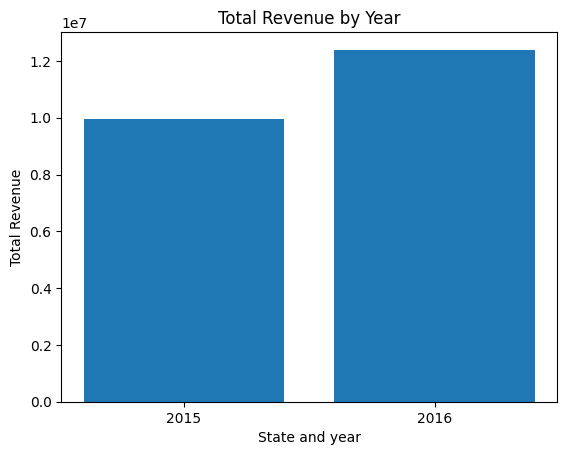

In [29]:
import matplotlib.pyplot as plt
#group the DataFrame by state and year, and sum the revenue column
grouped = amazon.groupby(['year'])['Total Revenue'].sum().reset_index()

# create a bar chart showing revenue by state and year
fig, ax = plt.subplots()
ax.bar( grouped['year'].astype(str), grouped['Total Revenue'])
ax.set_xlabel('State and year')
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue by Year')
plt.show()

**Yearly comparison based on Month**

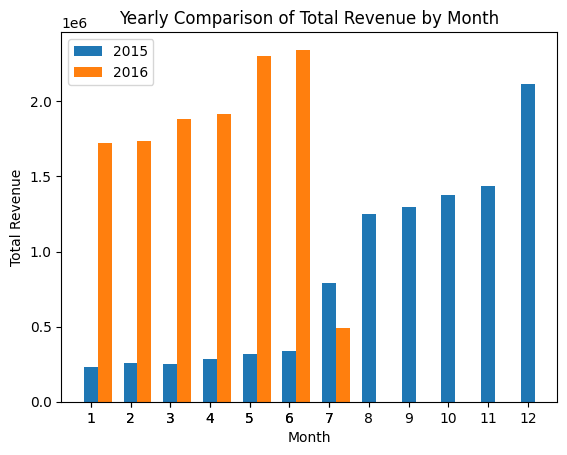

In [31]:
# group the DataFrame by year and month, and sum the revenue column
grouped = amazon.groupby(['year', 'Month'])['Total Revenue'].sum().reset_index()

# create a grouped bar chart showing revenue by year and month
fig, ax = plt.subplots()
width = 0.35
ax.bar(grouped[grouped['year'] == 2015]['Month'], grouped[grouped['year'] == 2015]['Total Revenue'], width, label='2015')
ax.bar(grouped[grouped['year'] == 2016]['Month'] + width, grouped[grouped['year'] == 2016]['Total Revenue'], width, label='2016')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
ax.set_title('Yearly Comparison of Total Revenue by Month')
ax.set_xticks(grouped['Month'])
ax.legend()
plt.show()